In [1]:
# Welcome to the Relax data science challenge! Let's import some libraries and see where we are.

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

'C:\\Users\\David Olivero\\AnacondaProjects\\springboard\\Springboard'

In [40]:
# Next we'll load the first csv file and take a look.

users = pd.read_csv('takehome_users.csv',encoding="ISO-8859-1", index_col = 0)
users.head()


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [41]:
users.shape

(12000, 9)

It looks like we have a total of 12,000 users. How many of these will turn out to be so-called "adopted users"? 

In [42]:
# Next we will load the next csv file and see what it looks like.

engage = pd.read_csv('takehome_user_engagement.csv')

engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [43]:
engage.shape

(207917, 3)

In [44]:
engage.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [45]:
total_visits = engage.groupby('user_id').count()['visited']

In [46]:
engage = pd.merge(engage, total_visits, how ='left', on = "user_id")

In [47]:
engage.head()

,time_stamp,user_id,visited_x,visited_y
0,2014-04-22 03:53:30,1,1,1
1,2013-11-15 03:45:04,2,1,14
2,2013-11-29 03:45:04,2,1,14
3,2013-12-09 03:45:04,2,1,14
4,2013-12-25 03:45:04,2,1,14


In [48]:
# We need to convert the time_stamp from an object type to a datetime format.

engage.time_stamp = pd.to_datetime(engage.time_stamp)

In [49]:
# We'll create an empty dictionary to hold the adopted variable (0 = not, 1 = adopted)

adopted = dict()

In [50]:
# Write a for loop to go through dataframe and find adopted users:

for user in engage.user_id.unique():
    adopted[user] = 0
    if total_visits.loc[user] >= 3:
        list = engage[engage['user_id'] == user]
        jumps = []
        n = list.index[0]
        for i in np.arange(0, total_visits.loc[user] - 2):
            jumps.append((list['time_stamp'][n+i+2] - list['time_stamp'][n+i]).days)
        if min(jumps) <= 7:
            adopted[user] = 1
                
                
            
         

In [51]:
# This is what the resulting dictionary looks like. 
print(adopted)

{1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 10: 1, 11: 0, 13: 0, 14: 0, 17: 0, 19: 0, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 33: 1, 36: 0, 37: 0, 41: 0, 42: 1, 43: 1, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 53: 1, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 1, 72: 0, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 80: 1, 81: 1, 82: 1, 83: 0, 84: 0, 85: 0, 86: 0, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 103: 0, 105: 0, 106: 0, 107: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 119: 0, 121: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 132: 0, 133: 1, 135: 1, 136: 0, 138: 0, 139: 0, 140: 0, 141: 1, 142: 0, 143: 0, 144: 0, 146: 1, 147: 0, 150: 0, 151: 0, 153: 1, 154: 0, 155: 0, 156: 0, 158: 0, 159: 0, 160: 1, 161: 0, 162: 0, 164: 0, 165: 1, 167: 0, 168: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 0

In [52]:
# We convert the dictionary into a list
adopted = pd.DataFrame(adopted.items(), columns=['user_id', 'Adopted'])

In [53]:
adopted.tail()

,user_id,Adopted
8818,11996,0
8819,11997,0
8820,11998,0
8821,11999,0
8822,12000,0


In [54]:
adopted.shape

(8823, 2)

The result of the above is that, for each of the 12000 users, we have an encoded value for whether or not we consider that user to be "adopted". The resulting dataframe is shown below. 

In [55]:
users = pd.merge(adopted, users, right_on = 'object_id', left_on='user_id', how = 'left')

users.head()

,user_id,Adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [56]:
users.shape

(8823, 11)

Now it's time to prepare this dataset for analysis. For each column we'll decide how best to present it to the modeling effort.

In [57]:
users.creation_time = pd.to_datetime(users.creation_time)

In [58]:
users.creation_time.describe()

count                    8823
unique                   8821
top       2014-02-11 17:57:53
freq                        2
first     2012-05-31 00:43:27
last      2014-05-30 23:59:19
Name: creation_time, dtype: object

In [59]:
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time, unit = 's')

In [60]:
users.last_session_creation_time.describe()

count                    8823
unique                   8821
top       2014-06-04 07:46:58
freq                        2
first     2012-05-31 08:20:06
last      2014-06-06 14:58:50
Name: last_session_creation_time, dtype: object

In [61]:
users.groupby('creation_source').count()['name']

creation_source
GUEST_INVITE          1588
ORG_INVITE            3188
PERSONAL_PROJECTS      764
SIGNUP                1898
SIGNUP_GOOGLE_AUTH    1385
Name: name, dtype: int64

In [62]:
# Convert the five source creation categories into one-hot encoded columns. 
onehot = pd.get_dummies(users['creation_source'])

In [63]:
onehot.head(10)

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,0,0,1,0
7,0,1,0,0,0
8,0,0,0,1,0
9,0,1,0,0,0


In [64]:
# Create a binary column indicating if a user was invited or not. 

invited = [1 if x > 0 else 0 for x in users['invited_by_user_id']]

In [65]:
# Here we create a feature that is the time span between a user account first being created, and last being used. 

users['time_span'] = (users['last_session_creation_time'] - users['creation_time'])
users['time_span'] = [x.days for x in users['time_span']]

In [66]:
users.head()

,user_id,Adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_span
0,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136
2,3,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1
4,5,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5


In [67]:
# We pull relevant features from this dataframe to create our modeling dataset. 

X = users[['opted_in_to_mailing_list', 'enabled_for_marketing_drip','org_id','time_span']].join(onehot)

In [68]:
# To X we add the invited binary, which first must be converted to a dataframe. 
X = X.join(pd.DataFrame(invited, columns = ['invited']))
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,time_span,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,invited
0,1,0,11,0,1,0,0,0,0,1
1,0,0,1,136,0,1,0,0,0,1
2,0,0,94,0,0,1,0,0,0,1
3,0,0,1,1,1,0,0,0,0,1
4,0,0,193,5,1,0,0,0,0,1


In [70]:
# All looks in order:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   opted_in_to_mailing_list    8823 non-null   int64
 1   enabled_for_marketing_drip  8823 non-null   int64
 2   org_id                      8823 non-null   int64
 3   time_span                   8823 non-null   int64
 4   GUEST_INVITE                8823 non-null   uint8
 5   ORG_INVITE                  8823 non-null   uint8
 6   PERSONAL_PROJECTS           8823 non-null   uint8
 7   SIGNUP                      8823 non-null   uint8
 8   SIGNUP_GOOGLE_AUTH          8823 non-null   uint8
 9   invited                     8823 non-null   int64
dtypes: int64(5), uint8(5)
memory usage: 776.7 KB


In [71]:
# This is our outcome variable. 
y = users['Adopted']

In [72]:
y.value_counts()

0    7167
1    1656
Name: Adopted, dtype: int64

With our input and output variables thus identified, we need to load some packages for modeling. 

In [73]:
# Load libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
# Create training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=5, max_depth = 5, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.968
Accuracy score (validation): 0.958

Learning rate:  0.1
Accuracy score (training): 0.971
Accuracy score (validation): 0.960

Learning rate:  0.25
Accuracy score (training): 0.976
Accuracy score (validation): 0.956

Learning rate:  0.5
Accuracy score (training): 0.981
Accuracy score (validation): 0.956

Learning rate:  0.75
Accuracy score (training): 0.986
Accuracy score (validation): 0.954

Learning rate:  1
Accuracy score (training): 0.985
Accuracy score (validation): 0.952



In [77]:
# Fit the best model: 

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.1, max_features=5, max_depth = 5, random_state = 0)
gb.fit(X_train, y_train)

y_predgb = gb.predict(X_test)

In [78]:
# F1 score is pretty good, and AUC is only 91% or so:

print(f1_score(y_test, y_predgb), roc_auc_score(y_test, y_predgb))

0.893939393939394 0.917851986145248


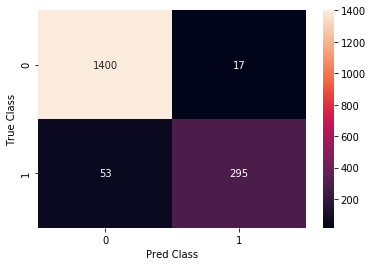

In [79]:
# Generate a confusion matrix
gbmatrix = pd.DataFrame(confusion_matrix(y_test, y_predgb))

sns.heatmap(gbmatrix, annot=True, fmt='d')
plt.ylabel('True Class'), plt.xlabel('Pred Class')
plt.show()

10


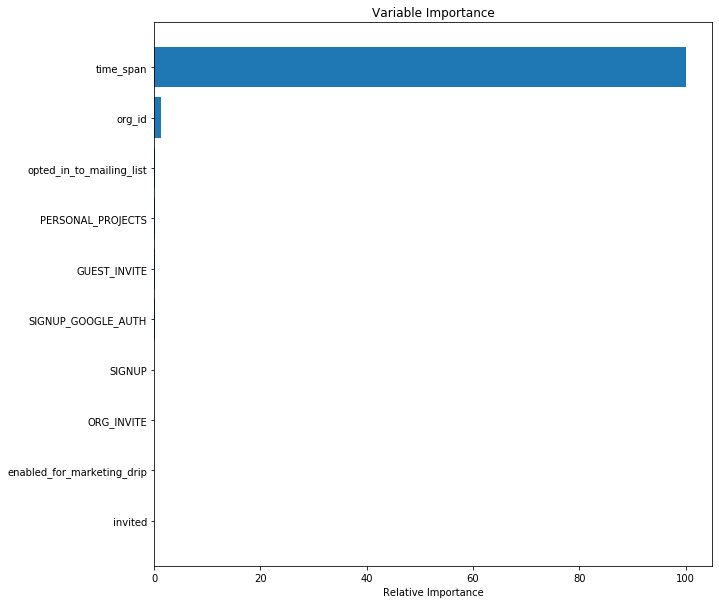

In [80]:
# obtain the feature importances from the gradient boosting model:
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-10:]

# Plot the relative importances on a horizontal barchart:

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()